<b>NEXTDEV</b> Digitalent Academy : Python Assignment 1 - Data Visualization<br>
Lecture : <strong> Afif A.I. </strong> <br>
code by : <strong>Wahyu Fachrur Zulfikar</strong>

In [121]:
import numpy as numpy
import pandas as pandas
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

## <b> Persiapan dataset </b>

sebelum memulai pembuatan model machine learning, kita harus menyiapkan dataset yang sudah bersih dan siap dimasukkan pada berbagai model yang akan kita buat. hal ini juga biasa disebut dengan <u><b>preprocessing data & data cleansing</b></u> <br>
tahapan yang dilakukan adalah:
<ul>
<li>Load dataset</li>
<li>bersihkan dataset dari data duplikasi data</li>
<li>ubah tipe kolom object menjadi category</li>
<li>ubah nilai dari category menjadi numerik <i>(label encoder)</i></li>
<li>reduksi dimensi pada kolom dengan menggunakan metode PCA</li>
<li>bagi dataset menjadi X_train, X_test, y_train, y_test</li>
</ul>
hasil yang akan diperoleh dari persiapan ini adalah data yang siap untuk dimasukkan pada model machine learning kita

In [122]:
df_bank = pandas.read_csv("bank-additional/bank-additional-full.csv", sep=";")
df_bank.shape

(41188, 21)

In [123]:
df_bank.drop_duplicates(inplace=True)
df_bank.reset_index(inplace=True)
df_bank.drop(labels="index",axis= 1, inplace=True)
df_bank.shape

(41176, 21)

In [124]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

dikarenakan hasil dari data diatas terdapat data dengan Dtype "object", maka kita akan mengubah tipe data tersebut menjadi tipe category. fungsi dari pengubahan data ini adalah untuk memastikan bahwa data pada kolom "object" merupakan data yang sudah ditentukan nilainya yang berupa field \<select\>

kolom yang akan diubah adalah 
["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]

In [125]:
ctg = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
for col in ctg:
    df_bank[col] = df_bank[col].astype("category")

In [126]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  category
 2   marital         41176 non-null  category
 3   education       41176 non-null  category
 4   default         41176 non-null  category
 5   housing         41176 non-null  category
 6   loan            41176 non-null  category
 7   contact         41176 non-null  category
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  category
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.id

In [127]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Setelah Dtype "object" telah diubah manjadi Dtype "category", maka langkah selanjutnya adalah mengubah nilai dari dalam data menjadi bentuk angka untuk memudahkan permodelan dalam machine learning

In [128]:
#label encoder
# ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"]
le = preprocessing.LabelEncoder()

#ubah data label menjadi numbers
job_encoded = le.fit_transform(df_bank["job"])
marital_encoded = le.fit_transform(df_bank["marital"])
education_encoded = le.fit_transform(df_bank["education"])
default_encoded = le.fit_transform(df_bank["default"])
housing_encoded = le.fit_transform(df_bank["housing"])
loan_encoded = le.fit_transform(df_bank["loan"])
contact_encoded = le.fit_transform(df_bank["contact"])
month_encoded = le.fit_transform(df_bank["month"])
day_of_week_encoded = le.fit_transform(df_bank["day_of_week"])
poutcome_encoded = le.fit_transform(df_bank["poutcome"])
y_encoded = le.fit_transform(df_bank["y"])


In [129]:
# siapkan variabel untuk data category
job_category =  df_bank["job"].dtype.categories
marital_category = df_bank["marital"].dtype.categories
education_category = df_bank["education"].dtype.categories
default_category = df_bank["default"].dtype.categories
housing_category = df_bank["housing"].dtype.categories
loan_category = df_bank["loan"].dtype.categories
contact_category = df_bank["contact"].dtype.categories
month_category = df_bank["month"].dtype.categories
day_of_week_category = df_bank["day_of_week"].dtype.categories
poutcome_category = df_bank["poutcome"].dtype.categories
y_category = df_bank["y"].dtype.categories

In [130]:
# ubah kolom data label menjadi kolom data angka
df_bank["job"] = job_encoded
df_bank["marital"] = marital_encoded
df_bank["education"] = education_encoded
df_bank["default"] = default_encoded
df_bank["housing"] = housing_encoded
df_bank["loan"] = loan_encoded
df_bank["contact"] = contact_encoded
df_bank["month"] = month_encoded
df_bank["day_of_week"] = day_of_week_encoded
df_bank["poutcome"] = poutcome_encoded
df_bank["y"] = y_encoded

In [131]:
feature_name = df_bank.columns

In [132]:
y_output = df_bank["y"]
df_bank.drop(labels="y", axis=1, inplace=True)

#### mereduksi dimensi pada kolom menjadi 2 komponen menggunakan PCA

<AxesSubplot:>

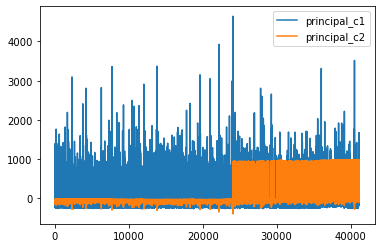

In [133]:
pca = PCA(n_components=2)

principalComponent = pca.fit_transform(df_bank)
principalDf = pandas.DataFrame(data=principalComponent, columns=["principal_c1", "principal_c2"])
principalDf.plot()

In [134]:
# (trial and error salah satu metode)

# Training dengan menggunakan principal data dari df_bank
# X_train, X_test, y_train, y_test = train_test_split(principalDf, y_output, test_size=0.3, random_state=3)

# training dengan menggunakan data original df_bank 
X_train, X_test, y_train, y_test = train_test_split(df_bank, y_output, test_size=0.3, random_state=3)

## <b>Persiapan model machine learning</b>

Dalam case kali ini, kita akan mencoba berbagai model machine learning antara lain:
<ul>
<li>Logistic Regression</li>
<li>K-Nearest Neighbour</li>
<li>Support Vector Machine</li>
<li>Decision Tree</li>
<li>Random Forest</li>
<li>Naive Bayes</li>
<li>Confusion Matrix</li>
</ul>

#### <u><b>Logistic Regression</b></u>

In [135]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [136]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=1)
model.fit(X_train, y_train)
logreg_pred = model.predict(X_test)

print(classification_report(y_test, logreg_pred))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10965
           1       0.66      0.41      0.50      1388

    accuracy                           0.91     12353
   macro avg       0.79      0.69      0.73     12353
weighted avg       0.90      0.91      0.90     12353

Accuracy: 0.9093337650773091


#### <u><b>K-Nearest Neighbour</b></u>

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None)

# Train the model using the training sets
knn_model.fit(X_train, y_train)

#Predict Output
knn_pred = knn_model.predict(X_test)

print(classification_report(y_test, knn_pred))
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10965
           1       0.58      0.48      0.53      1388

    accuracy                           0.90     12353
   macro avg       0.76      0.72      0.74     12353
weighted avg       0.90      0.90      0.90     12353

Accuracy: 0.9032623654173075


#### <u><b>SVM (Support Vector Machine)</b></u>

In [141]:
from sklearn import svm

In [142]:
clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train) 

#Predict the response for test dataset
svm_pred = clf.predict(X_test)

print(classification_report(y_test, svm_pred))
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94     10965
           1       0.53      0.49      0.51      1388

    accuracy                           0.89     12353
   macro avg       0.73      0.72      0.73     12353
weighted avg       0.89      0.89      0.89     12353

Accuracy: 0.8944385979114385


#### <u><b>Decision Tree Classifier</b></u>

In [143]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
dtc_pred = clf.predict(X_test)

print(classification_report(y_test, dtc_pred))
print("Accuracy:",metrics.accuracy_score(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10965
           1       0.52      0.52      0.52      1388

    accuracy                           0.89     12353
   macro avg       0.73      0.73      0.73     12353
weighted avg       0.89      0.89      0.89     12353

Accuracy: 0.8912814700882377


#### <u><b>Random Forest</b></u>

In [144]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
 
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train) 

randfor_pred = clf.predict(X_test)

print(classification_report(y_test, randfor_pred))
print("Accuracy:",metrics.accuracy_score(y_test, randfor_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10965
           1       0.66      0.51      0.57      1388

    accuracy                           0.92     12353
   macro avg       0.80      0.74      0.76     12353
weighted avg       0.91      0.92      0.91     12353

Accuracy: 0.9150004047599773


#### <u><b>Naive Bayes</b></u>

In [145]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
nb_pred = model.predict(X_test)

print(classification_report(y_test, nb_pred))
print("Accuracy:",metrics.accuracy_score(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10965
           1       0.38      0.59      0.46      1388

    accuracy                           0.85     12353
   macro avg       0.66      0.74      0.69     12353
weighted avg       0.88      0.85      0.86     12353

Accuracy: 0.8463531126042257


#### <u><b>Confussion Matriks</b></u>

In [146]:
print(confusion_matrix(y_test, logreg_pred))
print()

print(confusion_matrix(y_test, knn_pred))
print()

print(confusion_matrix(y_test, svm_pred))
print()

print(confusion_matrix(y_test, randfor_pred))
print()

print(confusion_matrix(y_test, dtc_pred))
print()

print(confusion_matrix(y_test, nb_pred))

[[10668   297]
 [  823   565]]

[[10489   476]
 [  719   669]]

[[10367   598]
 [  706   682]]

[[10594   371]
 [  679   709]]

[[10286   679]
 [  664   724]]

[[9633 1332]
 [ 566  822]]
